# Basic Thicket Tutorial: Thicket 101

Thicket is a python-based toolkit for Exploratory Data Analysis (EDA) of parallel performance data that enables performance optimization and understanding of applications’ performance on supercomputers. It bridges the performance tool gap between being able to consider only a single instance of a simulation run (e.g., single platform, single measurement tool, or single scale) and finding actionable insights in multi-dimensional, multi-scale, multi-architecture, and multi-tool performance datasets.

***

## 1. Import Necessary Packages

To explore the structure and various capabilities of thicket components, we begin by importing necessary packages. These include python extensions and thicket's statistical functions.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import hatchet as ht
import thicket as tt

<IPython.core.display.Javascript object>

## 2. Read in Performance Profiles

For this notebook, we select profiles generated on Lawrence Livermore National Lab(LLNL) machine, lassen. We create two thicket objects, one generated with the same problem size of 1048576 and the other generated with different problem sizes (1048576 and 4194304).   

In [2]:
lassen1 = [f"../data/lassen/XL_BaseCuda_01048576_0{x}.cali" for x in range(1, 4)]
lassen2 = [f"../data/lassen/XL_BaseCuda_04194304_01.cali"]

# generate thicket(s)
th_lassen = tt.Thicket.from_caliperreader(lassen1)
th_obj = tt.Thicket.from_caliperreader(lassen1+lassen2)

## 3. More Information on a Function
***
You can use the help() method within Python to see the information for a given object. You can do this by typing help(object). 
This will allow you to see the arguments for the function, and what will be returned. An example is below.

In [3]:
help(tt.median)

Help on function median in module thicket.stats.median:

median(thicket, columns=None)
    Calculate the median for each node in the performance data table.
    
    Designed to take in a thicket, and append one or more columns to the
    aggregated statistics table for the median calculation for each node.
    
    Arguments:
        thicket (thicket): Thicket object
        columns (list): List of hardware/timing metrics to perform median calculation
            on. Note, if using a columnar joined thicket a list of tuples must be passed
            in with the format (column index, column name).



## 4. Thicket Components

### 4.1 Performance Data

The performance data table is a multi-dimensional, multi-indexed component of thicket. The rows represent nodes that each contain a different execution (i.e., profile index) of the associated call tree node. 


#### View performance data table:

In [4]:
th_lassen.dataframe

nid  \
node                                               profile                     
{'name': 'Base_CUDA', 'type': 'function'}          -8257295553909972609    0   
                                                   -6041443592866873569    0   
                                                    3960556426686607732    0   
{'name': 'Algorithm', 'type': 'function'}          -8257295553909972609    8   
                                                   -6041443592866873569    8   
...                                                                      ...   
{'name': 'Stream_TRIAD', 'type': 'function'}       -6041443592866873569  110   
                                                    3960556426686607732  110   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun... -8257295553909972609  111   
                                                   -6041443592866873569  111   
                                                    3960556426686607732  111   

                                                                          spot.channel  \
node                                               profile                               
{'name': 'Base_CUDA', 'type': 'function'}          -8257295553909972609  regionprofile   
                                                   -6041443592866873569  regionprofile   
                                                    3960556426686607732  regionprofile   
{'name': 'Algorithm', 'type': 'function'}          -8257295553909972609  regionprofile   
                                                   -6041443592866873569  regionprofile   
...                                                                                ...   
{'name': 'Stream_TRIAD', 'type': 'function'}       -6041443592866873569  regionprofile   
                                                    3960556426686607732  regionprofile   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun... -8257295553909972609  regionprofile   
                                                   -6041443592866873569  regionprofile   
                                                    3960556426686607732  regionprofile   

                                                                         Min time/rank  \
node                                               profile                               
{'name': 'Base_CUDA', 'type': 'function'}          -8257295553909972609       1.893661   
                                                   -6041443592866873569       1.885701   
                                                    3960556426686607732       1.892446   
{'name': 'Algorithm', 'type': 'function'}          -8257295553909972609       0.015072   
                                                   -6041443592866873569       0.015026   
...                                                                                ...   
{'name': 'Stream_TRIAD', 'type': 'function'}       -6041443592866873569       0.033671   
                                                    3960556426686607732       0.033738   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun... -8257295553909972609       0.033759   
                                                   -6041443592866873569       0.033662   
                                                    3960556426686607732       0.033730   

                                                                         Max time/rank  \
node                                               profile                               
{'name': 'Base_CUDA', 'type': 'function'}          -8257295553909972609       1.893661   
                                                   -6041443592866873569       1.885701   
                                                    3960556426686607732       1.892446   
{'name': 'Algorithm', 'type': 'function'}          -8257295553909972609       0.015072   
                                                   -6041443592866873569       0.015026   
...                                                         

### 4.2 Metadata

The metadata table stores HPC simulation information such as an application’s build settings and execution context. A row corresponds to a single execution of the application and is identified by a unique profile index.

#### View metadata table:

In [5]:
th_lassen.metadata

spot.channels spot.options  spot.format.version  \
profile                                                                 
-8257295553909972609  regionprofile                                 2   
-6041443592866873569  regionprofile                                 2   
 3960556426686607732  regionprofile                                 2   

                     spot.timeseries.metrics  \
profile                                        
-8257295553909972609                           
-6041443592866873569                           
 3960556426686607732                           

                                                           spot.metrics  \
profile                                                                   
-8257295553909972609  min#inclusive#sum#time.duration,max#inclusive#...   
-6041443592866873569  min#inclusive#sum#time.duration,max#inclusive#...   
 3960556426686607732  min#inclusive#sum#time.duration,max#inclusive#...   

                     cali.caliper.version    variant  \
profile                                                
-8257295553909972609            2.9.0-dev  Base_CUDA   
-6041443592866873569            2.9.0-dev  Base_CUDA   
 3960556426686607732            2.9.0-dev  Base_CUDA   

                                                       Algorithm_MEMCPY  \
profile                                                                   
-8257295553909972609  {'Problem size': 1048576,'Reps':100,'Iteration...   
-6041443592866873569  {'Problem size': 1048576,'Reps':100,'Iteration...   
 3960556426686607732  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                       Algorithm_MEMSET  \
profile                                                                   
-8257295553909972609  {'Problem size': 1048576,'Reps':100,'Iteration...   
-6041443592866873569  {'Problem size': 1048576,'Reps':100,'Iteration...   
 3960556426686607732  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                   Algorithm_REDUCE_SUM  ...  \
profile                                                                  ...   
-8257295553909972609  {'Problem size': 1048576,'Reps':50,'Iterations...  ...   
-6041443592866873569  {'Problem size': 1048576,'Reps':50,'Iterations...  ...   
 3960556426686607732  {'Problem size': 1048576,'Reps':50,'Iterations...  ...   

                     cmake_cxx_flags cmake_build_type raja_version  \
profile                                                              
-8257295553909972609      -qthreaded          Release    2022.03.0   
-6041443592866873569      -qthreaded          Release    2022.03.0   
 3960556426686607732      -qthreaded          Release    2022.03.0   

                     perfsuite_version cluster  \
profile                                          
-8257295553909972609          2022.3.0  lassen   
-6041443592866873569          2022.3.0  lassen   
 3960556426686607732          2022.3.0  lassen   

                                                                cmdline  \
profile                                                                   
-8257295553909972609  [./my-xl-block-128-build/bin/raja-perf.exe, --...   
-6041443592866873569  [./my-xl-block-128-build/bin/raja-perf.exe, --...   
 3960556426686607732  [./my-xl-block-128-build/bin/raja-perf.exe, --...   

                                                              libraries  \
profile                                                                   
-8257295553909972609  [/lib64/libdl.so.2, /lib64/librt.so.1, /usr/wo...   
-6041443592866873569  [/lib64/libdl.so.2, /lib64/librt.so.1, /usr/wo...   
 3960556426686607732  [/lib64/libdl.so.2, /lib64/librt.so.1, /usr/wo...   

                      launchdate      user cali.channel  
profile                                                  
-8257295553909972609  1668559527  burgess9         spot  
-6041443592866873569  1668559517  burgess9         spot  
 396055642668660773

#### Filter with respect to metadata

The metadata table of a thicket helps select certain variation based on specific metadata. For example, selecting a certain compiler. In this example, we filter the metadata to select the profiles generated with a block size of `128`.

In [6]:
# selecting profiles originating form the quartz cluster
filter_metadata_func = lambda x: x['gpu_targets_block_sizes'] == "128"
th_example = th_obj.filter_metadata(filter_metadata_func)
th_example.metadata

Empty DataFrame
Columns: [spot.channels, spot.options, spot.format.version, spot.timeseries.metrics, spot.metrics, cali.caliper.version, variant, Algorithm_MEMCPY, Algorithm_MEMSET, Algorithm_REDUCE_SUM, Algorithm_SORTPAIRS, Algorithm_SORT, Algorithm_SCAN, Apps_VOL3D, Apps_PRESSURE, Apps_NODAL_ACCUMULATION_3D, Apps_MASS3DPA, Apps_LTIMES_NOVIEW, Apps_LTIMES, Apps_HALOEXCHANGE_FUSED, Apps_HALOEXCHANGE, Apps_FIR, Apps_ENERGY, Apps_DIFFUSION3DPA, Apps_DEL_DOT_VEC_2D, Apps_CONVECTION3DPA, Stream_TRIAD, Stream_MUL, Stream_DOT, Stream_COPY, Stream_ADD, Polybench_MVT, Polybench_JACOBI_2D, Polybench_JACOBI_1D, Polybench_HEAT_3D, Polybench_GESUMMV, Polybench_GEMVER, Polybench_GEMM, Polybench_FLOYD_WARSHALL, Polybench_FDTD_2D, Polybench_ATAX, Polybench_ADI, Polybench_3MM, Polybench_2MM, Lcals_TRIDIAG_ELIM, Lcals_PLANCKIAN, Lcals_INT_PREDICT, Lcals_HYDRO_2D, Lcals_HYDRO_1D, Lcals_GEN_LIN_RECUR, Lcals_FIRST_SUM, Lcals_FIRST_MIN, Lcals_FIRST_DIFF, Lcals_EOS, Lcals_DIFF_PREDICT, Basic_TRAP_INT, Basic_REDUCE_STRUCT, Basic_REDUCE3_INT, Basic_PI_REDUCE, Basic_PI_ATOMIC, Basic_NESTED_INIT, Basic_MULADDSUB, Basic_MAT_MAT_SHARED, Basic_INIT_VIEW1D_OFFSET, Basic_INIT_VIEW1D, Basic_INIT3, Basic_INDEXLIST_3LOOP, Basic_INDEXLIST, Basic_IF_QUAD, Basic_DAXPY_ATOMIC, Basic_DAXPY, SizeMeaning, Tuning, machine_build, systype_build, gpu_targets_block_sizes, cuda_compiler_version, Compiler_path_version, compiler, compiler_version, rajaperf_compiler_options, rajaperf_compiler, cmake_exe_linker_flags, cmake_cxx_flags, cmake_build_type, raja_version, perfsuite_version, cluster, cmdline, libraries, launchdate, user, cali.channel]
Index: []

[0 rows x 93 columns]

#### Group with the metadata 

The metadata table also supports the grouping of the thicket based on the unique values present in the provided column(s). The following example groups the thicket according to any unique combination of values in the `launchdate` and `gpu_targets_block_sizes` columns.

In [7]:
# create sub-thickets from unique values in the cluster column
grouping_metadata_cols = ['launchdate', 'gpu_targets_block_sizes']
sub_thickets = th_lassen.groupby(grouping_metadata_cols)
for th in sub_thickets:
    display(th.metadata)

3  thickets created...
[(1668559508, 128), (1668559517, 128), (1668559527, 128)]


spot.channels spot.options  spot.format.version  \
profile                                                                
3960556426686607732  regionprofile                                 2   

                    spot.timeseries.metrics  \
profile                                       
3960556426686607732                           

                                                          spot.metrics  \
profile                                                                  
3960556426686607732  min#inclusive#sum#time.duration,max#inclusive#...   

                    cali.caliper.version    variant  \
profile                                               
3960556426686607732            2.9.0-dev  Base_CUDA   

                                                      Algorithm_MEMCPY  \
profile                                                                  
3960556426686607732  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                      Algorithm_MEMSET  \
profile                                                                  
3960556426686607732  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                  Algorithm_REDUCE_SUM  ...  \
profile                                                                 ...   
3960556426686607732  {'Problem size': 1048576,'Reps':50,'Iterations...  ...   

                    cmake_cxx_flags cmake_build_type raja_version  \
profile                                                             
3960556426686607732      -qthreaded          Release    2022.03.0   

                    perfsuite_version cluster  \
profile                                         
3960556426686607732          2022.3.0  lassen   

                                                               cmdline  \
profile                                                                  
3960556426686607732  [./my-xl-block-128-build/bin/raja-perf.exe, --...   

                                                             libraries  \
profile                                                                  
3960556426686607732  [/lib64/libdl.so.2, /lib64/librt.so.1, /usr/wo...   

                     launchdate      user cali.channel  
profile                                                 
3960556426686607732  1668559508  burgess9         spot  

[1 rows x 92 columns]

spot.channels spot.options  spot.format.version  \
profile                                                                 
-6041443592866873569  regionprofile                                 2   

                     spot.timeseries.metrics  \
profile                                        
-6041443592866873569                           

                                                           spot.metrics  \
profile                                                                   
-6041443592866873569  min#inclusive#sum#time.duration,max#inclusive#...   

                     cali.caliper.version    variant  \
profile                                                
-6041443592866873569            2.9.0-dev  Base_CUDA   

                                                       Algorithm_MEMCPY  \
profile                                                                   
-6041443592866873569  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                       Algorithm_MEMSET  \
profile                                                                   
-6041443592866873569  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                   Algorithm_REDUCE_SUM  ...  \
profile                                                                  ...   
-6041443592866873569  {'Problem size': 1048576,'Reps':50,'Iterations...  ...   

                     cmake_cxx_flags cmake_build_type raja_version  \
profile                                                              
-6041443592866873569      -qthreaded          Release    2022.03.0   

                     perfsuite_version cluster  \
profile                                          
-6041443592866873569          2022.3.0  lassen   

                                                                cmdline  \
profile                                                                   
-6041443592866873569  [./my-xl-block-128-build/bin/raja-perf.exe, --...   

                                                              libraries  \
profile                                                                   
-6041443592866873569  [/lib64/libdl.so.2, /lib64/librt.so.1, /usr/wo...   

                      launchdate      user cali.channel  
profile                                                  
-6041443592866873569  1668559517  burgess9         spot  

[1 rows x 92 columns]

spot.channels spot.options  spot.format.version  \
profile                                                                 
-8257295553909972609  regionprofile                                 2   

                     spot.timeseries.metrics  \
profile                                        
-8257295553909972609                           

                                                           spot.metrics  \
profile                                                                   
-8257295553909972609  min#inclusive#sum#time.duration,max#inclusive#...   

                     cali.caliper.version    variant  \
profile                                                
-8257295553909972609            2.9.0-dev  Base_CUDA   

                                                       Algorithm_MEMCPY  \
profile                                                                   
-8257295553909972609  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                       Algorithm_MEMSET  \
profile                                                                   
-8257295553909972609  {'Problem size': 1048576,'Reps':100,'Iteration...   

                                                   Algorithm_REDUCE_SUM  ...  \
profile                                                                  ...   
-8257295553909972609  {'Problem size': 1048576,'Reps':50,'Iterations...  ...   

                     cmake_cxx_flags cmake_build_type raja_version  \
profile                                                              
-8257295553909972609      -qthreaded          Release    2022.03.0   

                     perfsuite_version cluster  \
profile                                          
-8257295553909972609          2022.3.0  lassen   

                                                                cmdline  \
profile                                                                   
-8257295553909972609  [./my-xl-block-128-build/bin/raja-perf.exe, --...   

                                                              libraries  \
profile                                                                   
-8257295553909972609  [/lib64/libdl.so.2, /lib64/librt.so.1, /usr/wo...   

                      launchdate      user cali.channel  
profile                                                  
-8257295553909972609  1668559527  burgess9         spot  

[1 rows x 92 columns]

### 4.3 Aggregated Statistics

The aggregated statistics in a thicket is a GraphFrame. Therefore, it contains a graph and corresponding dataframe component. The table supports an order-reduction mechanism and stores processed applications’ performance. Each row of the aggregated statistics table holds data aggregated across all profiles associated with a particular call tree node. Below is an example of an empty aggregated statistics table 


#### View aggregated statistics table:

In [8]:
th_lassen.statsframe.dataframe

name
node                                                                          
{'name': 'Base_CUDA', 'type': 'function'}                            Base_CUDA
{'name': 'Algorithm', 'type': 'function'}                            Algorithm
{'name': 'Algorithm_MEMCPY', 'type': 'function'}              Algorithm_MEMCPY
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...  Algorithm_MEMCPY.block_128
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...    Algorithm_MEMCPY.library
...                                                                        ...
{'name': 'Stream_DOT.block_128', 'type': 'funct...        Stream_DOT.block_128
{'name': 'Stream_MUL', 'type': 'function'}                          Stream_MUL
{'name': 'Stream_MUL.block_128', 'type': 'funct...        Stream_MUL.block_128
{'name': 'Stream_TRIAD', 'type': 'function'}                      Stream_TRIAD
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...      Stream_TRIAD.block_128

[132 rows x 1 columns]

#### Filter with respect to aggregated statistics

The aggregated statistics table also supports a filter function. In the example below, we filter the table to select the nodes with the names `Base_CUDA`, `Algorithm`, and `Stream_MUL`.

In [9]:
stats_nodes = ["Base_CUDA", "Algorithm", "Stream_MUL"]
th_stats_name = th_obj.filter_stats(lambda x: x['name'] in stats_nodes)
th_stats_name.statsframe.dataframe

name
node                                                  
{'name': 'Base_CUDA', 'type': 'function'}    Base_CUDA
{'name': 'Algorithm', 'type': 'function'}    Algorithm
{'name': 'Stream_MUL', 'type': 'function'}  Stream_MUL

#### Append the average (mean and median) of performance data

The aggregated statistics table allows users to select a column from the performance data to perform an average on the values in a column. After performing the `median()` and `mean()` operation on said column, two new columns are appended to the statistics table with the mean and median values corresponding to the columns provided by the user. 

Below is an example where we calculate the mean and median of the values in the `sum#sum#sum#time.duration` column, which is the total exclusive time corresponding to the respective nodes.  

In [10]:
metrics = ['Total time (exc)']
tt.median(th_lassen,columns=metrics)
th_lassen.statsframe.dataframe

name  \
node                                                                             
{'name': 'Base_CUDA', 'type': 'function'}                            Base_CUDA   
{'name': 'Algorithm', 'type': 'function'}                            Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}              Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...  Algorithm_MEMCPY.block_128   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...    Algorithm_MEMCPY.library   
...                                                                        ...   
{'name': 'Stream_DOT.block_128', 'type': 'funct...        Stream_DOT.block_128   
{'name': 'Stream_MUL', 'type': 'function'}                          Stream_MUL   
{'name': 'Stream_MUL.block_128', 'type': 'funct...        Stream_MUL.block_128   
{'name': 'Stream_TRIAD', 'type': 'function'}                      Stream_TRIAD   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...      Stream_TRIAD.block_128   

                                                    Total time (exc)_median  
node                                                                         
{'name': 'Base_CUDA', 'type': 'function'}                          0.000636  
{'name': 'Algorithm', 'type': 'function'}                          0.000048  
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   0.000016  
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...                 0.002440  
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                 0.002609  
...                                                                     ...  
{'name': 'Stream_DOT.block_128', 'type': 'funct...                 0.113655  
{'name': 'Stream_MUL', 'type': 'function'}                         0.000011  
{'name': 'Stream_MUL.block_128', 'type': 'funct...                 0.043271  
{'name': 'Stream_TRIAD', 'type': 'function'}                       0.000008  
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...                 0.033730  

[132 rows x 2 columns]

In [11]:
tt.mean(th_lassen,columns=metrics)
th_lassen.statsframe.dataframe

name  \
node                                                                             
{'name': 'Base_CUDA', 'type': 'function'}                            Base_CUDA   
{'name': 'Algorithm', 'type': 'function'}                            Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}              Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...  Algorithm_MEMCPY.block_128   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...    Algorithm_MEMCPY.library   
...                                                                        ...   
{'name': 'Stream_DOT.block_128', 'type': 'funct...        Stream_DOT.block_128   
{'name': 'Stream_MUL', 'type': 'function'}                          Stream_MUL   
{'name': 'Stream_MUL.block_128', 'type': 'funct...        Stream_MUL.block_128   
{'name': 'Stream_TRIAD', 'type': 'function'}                      Stream_TRIAD   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...      Stream_TRIAD.block_128   

                                                    Total time (exc)_median  \
node                                                                          
{'name': 'Base_CUDA', 'type': 'function'}                          0.000636   
{'name': 'Algorithm', 'type': 'function'}                          0.000048   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   0.000016   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...                 0.002440   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                 0.002609   
...                                                                     ...   
{'name': 'Stream_DOT.block_128', 'type': 'funct...                 0.113655   
{'name': 'Stream_MUL', 'type': 'function'}                         0.000011   
{'name': 'Stream_MUL.block_128', 'type': 'funct...                 0.043271   
{'name': 'Stream_TRIAD', 'type': 'function'}                       0.000008   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...                 0.033730   

                                                    Total time (exc)_mean  
node                                                                       
{'name': 'Base_CUDA', 'type': 'function'}                        0.000632  
{'name': 'Algorithm', 'type': 'function'}                        0.000048  
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                 0.000016  
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...               0.002442  
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...               0.002609  
...                                                                   ...  
{'name': 'Stream_DOT.block_128', 'type': 'funct...               0.112893  
{'name': 'Stream_MUL', 'type': 'function'}                       0.000011  
{'name': 'Stream_MUL.block_128', 'type': 'funct...               0.043180  
{'name': 'Stream_TRIAD', 'type': 'function'}                     0.000008  
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...               0.033717  

[132 rows x 3 columns]

#### Append the percentile of exclusive time on performance data

The aggregated statistics table allows users to select a column from the performance data to perform the `percentiles()` operation. This results in a new column appended to the statistics table containing the 25th, 50th, and 75th percentiles of the values in the provided column.

Below is an example where we calculate the percentiles of the values in the same `sum#sum#sum#time.duration` column.

In [12]:
tt.percentiles(th_lassen,columns=metrics)
th_lassen.statsframe.dataframe

name  \
node                                                                             
{'name': 'Base_CUDA', 'type': 'function'}                            Base_CUDA   
{'name': 'Algorithm', 'type': 'function'}                            Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}              Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...  Algorithm_MEMCPY.block_128   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...    Algorithm_MEMCPY.library   
...                                                                        ...   
{'name': 'Stream_DOT.block_128', 'type': 'funct...        Stream_DOT.block_128   
{'name': 'Stream_MUL', 'type': 'function'}                          Stream_MUL   
{'name': 'Stream_MUL.block_128', 'type': 'funct...        Stream_MUL.block_128   
{'name': 'Stream_TRIAD', 'type': 'function'}                      Stream_TRIAD   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...      Stream_TRIAD.block_128   

                                                    Total time (exc)_median  \
node                                                                          
{'name': 'Base_CUDA', 'type': 'function'}                          0.000636   
{'name': 'Algorithm', 'type': 'function'}                          0.000048   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   0.000016   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...                 0.002440   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                 0.002609   
...                                                                     ...   
{'name': 'Stream_DOT.block_128', 'type': 'funct...                 0.113655   
{'name': 'Stream_MUL', 'type': 'function'}                         0.000011   
{'name': 'Stream_MUL.block_128', 'type': 'funct...                 0.043271   
{'name': 'Stream_TRIAD', 'type': 'function'}                       0.000008   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...                 0.033730   

                                                    Total time (exc)_mean  \
node                                                                        
{'name': 'Base_CUDA', 'type': 'function'}                        0.000632   
{'name': 'Algorithm', 'type': 'function'}                        0.000048   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                 0.000016   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...               0.002442   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...               0.002609   
...                                                                   ...   
{'name': 'Stream_DOT.block_128', 'type': 'funct...               0.112893   
{'name': 'Stream_MUL', 'type': 'function'}                       0.000011   
{'name': 'Stream_MUL.block_128', 'type': 'funct...               0.043180   
{'name': 'Stream_TRIAD', 'type': 'function'}                     0.000008   
{'name': 'Stream_TRIAD.block_128', 'type': 'fun...               0.033717   

                                                                         Total time (exc)_percentiles  
node                                                                                                   
{'name': 'Base_CUDA', 'type': 'function'}                             [0.0006265, 0.000636, 0.000639]  
{'name': 'Algorithm', 'type': 'function'}                  [4.6500000000000005e-05, 4.8e-05, 4.9e-05]  
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                          [1.6e-05, 1.6e-05, 1.6e-05]  
{'name': 'Algorithm_MEMCPY.block_128', 'type': ...                    [0.0024395, 0.00244, 0.0024435]  
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                    [0.0026085, 0.002609, 0.002609]  
...                                                                                               ...  
{'name': 'Stream_DOT.block_128', 'type': 'funct...  [0.11216000000000001, 0.113655, 0.114006500000...  
{'name': 'Stream_MUL', 'type': 'function'

#### View aggregated statistics call tree:

* More explanation about the calc_average() function and the selected column `sum#sum#sum#time.duration_median` below.

In [13]:
th_lassen.dataframe.columns

Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Min time/rank (exc)',
       'Max time/rank (exc)', 'Avg time/rank (exc)', 'Total time (exc)',
       'name'],
      dtype='object')

In [14]:
tt.median(th_lassen, columns=['Total time (exc)'])
print(th_lassen.statsframe.tree(metric_column='Total time (exc)_median'))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2023.1.0

0.001 Base_CUDA
├─ 0.000 Algorithm
│  ├─ 0.000 Algorithm_MEMCPY
│  │  ├─ 0.002 Algorithm_MEMCPY.block_128
│  │  └─ 0.003 Algorithm_MEMCPY.library
│  ├─ 0.000 Algorithm_MEMSET
│  │  ├─ 0.001 Algorithm_MEMSET.block_128
│  │  └─ 0.001 Algorithm_MEMSET.library
│  ├─ 0.000 Algorithm_REDUCE_SUM
│  │  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
│  │  └─ 0.002 Algorithm_REDUCE_SUM.cub
│  └─ 0.000 Algorithm_SCAN
│     └─ 0.003 Algorithm_SCAN.default
├─ 0.000 Apps
│  ├─ 0.000 Apps_CONVECTION3DPA
│  │  └─ 0.003 Apps_CONVECTION3DPA.block_64
│  ├─ 0.000 Apps_DEL_DOT_VEC_2D
│  │  └─ 0.007 Apps_DEL_DOT_VEC_2D.block_128
│  ├─ 0.000 Apps_DIFFUSION3DPA
│  │  └─ 0.005 Apps_DIFFUSION3DPA.block_64
│  ├─ 0.000 Apps_ENERGY
│  │  └─ 0.039 Apps_ENERGY.block_128
│  ├─ 0.000 Apps_FIR
│  │  └─ 0.004 Apps_FIR.bl

#### Use the Query Language

Thicket's query language provides users the capability to select or `query` specific nodes based on the call tree of the thicket. The performance data is then updated as part of the operation. 

**Initial call tree:** 

In [15]:
print(th_lassen.statsframe.tree('Total time (exc)_median'))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2023.1.0

0.001 Base_CUDA
├─ 0.000 Algorithm
│  ├─ 0.000 Algorithm_MEMCPY
│  │  ├─ 0.002 Algorithm_MEMCPY.block_128
│  │  └─ 0.003 Algorithm_MEMCPY.library
│  ├─ 0.000 Algorithm_MEMSET
│  │  ├─ 0.001 Algorithm_MEMSET.block_128
│  │  └─ 0.001 Algorithm_MEMSET.library
│  ├─ 0.000 Algorithm_REDUCE_SUM
│  │  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
│  │  └─ 0.002 Algorithm_REDUCE_SUM.cub
│  └─ 0.000 Algorithm_SCAN
│     └─ 0.003 Algorithm_SCAN.default
├─ 0.000 Apps
│  ├─ 0.000 Apps_CONVECTION3DPA
│  │  └─ 0.003 Apps_CONVECTION3DPA.block_64
│  ├─ 0.000 Apps_DEL_DOT_VEC_2D
│  │  └─ 0.007 Apps_DEL_DOT_VEC_2D.block_128
│  ├─ 0.000 Apps_DIFFUSION3DPA
│  │  └─ 0.005 Apps_DIFFUSION3DPA.block_64
│  ├─ 0.000 Apps_ENERGY
│  │  └─ 0.039 Apps_ENERGY.block_128
│  ├─ 0.000 Apps_FIR
│  │  └─ 0.004 Apps_FIR.bl

**Example 1**

**Queried call tree:**

In the example below, we use a thicket query that only select the parents and children nodes of `Algorithm`, maintaining the structure of the call tree.

NOTE: A DeprecationWarning is generated when using “old-style” queries (i.e., queries with QueryMatcher) if you have the newest version of Hatchet installed.

In [34]:
alg_query_ex1 = (
    ht.QueryMatcher()
    .match("*")
    .rel(
        ".", 
        lambda row: row["name"].apply(
        lambda x: re.match(
            r"Algorithm.*", x
        ) 
        is not None).all()
    )
)
    
# applying the query on the lassen thicket
th_algorithm_ex1 = th_lassen.query(alg_query_ex1)
tt.median(th_algorithm_ex1, columns=['Total time (exc)'])
print(th_algorithm_ex1.statsframe.tree('Total time (exc)_median'))

/var/folders/g4/9_n9kks14t17ldr01p_rgsw00000gn/T/ipykernel_2348/876872136.py:2: DeprecationWarning: Old-style queries are deprecated and will be removed in the                     future. Please use new-style queries instead.                     For QueryMatcher, the equivalent new-style queries are                     hatchet.query.Query for base-syntax queries and                     hatchet.query.ObjectQuery for the object-dialect.
  ht.QueryMatcher()


    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2023.1.0

0.001 Base_CUDA
└─ 0.000 Algorithm
   ├─ 0.000 Algorithm_MEMCPY
   │  ├─ 0.002 Algorithm_MEMCPY.block_128
   │  └─ 0.003 Algorithm_MEMCPY.library
   ├─ 0.000 Algorithm_MEMSET
   │  ├─ 0.001 Algorithm_MEMSET.block_128
   │  └─ 0.001 Algorithm_MEMSET.library
   ├─ 0.000 Algorithm_REDUCE_SUM
   │  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
   │  └─ 0.002 Algorithm_REDUCE_SUM.cub
   └─ 0.000 Algorithm_SCAN
      └─ 0.003 Algorithm_SCAN.default

Legend (Metric: Total time (exc)_median Min: 0.00 Max: 0.00)
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00

name User code    ◀  Only in left graph    ▶  Only in right graph



**Example 2**

**Queried call tree:**

In the example below, we use a thicket query that selects the only the `Algorithm` node and it's children nodes, maintaining the structure of the call tree.

NOTE: A DeprecationWarning is generated when using “old-style” queries (i.e., queries with QueryMatcher) if you have the newest version of Hatchet installed.

In [17]:
alg_query_ex2 = (
    ht.QueryMatcher()
    .match(
        ".",
        lambda row: row["name"].apply(
        lambda x: re.match(
            r"Algorithm.*", x
        ) 
        is not None).all()
    )
    .rel("*")
)

# applying the second query on the lassen thicket
th_algorithm_ex2 = th_lassen.query(alg_query_ex2)
tt.median(th_algorithm_ex2, columns=['Total time (exc)'])
print(th_algorithm_ex2.statsframe.tree('Total time (exc)_median'))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2023.1.0

0.000 Algorithm
├─ 0.000 Algorithm_MEMCPY
│  ├─ 0.002 Algorithm_MEMCPY.block_128
│  └─ 0.003 Algorithm_MEMCPY.library
├─ 0.000 Algorithm_MEMSET
│  ├─ 0.001 Algorithm_MEMSET.block_128
│  └─ 0.001 Algorithm_MEMSET.library
├─ 0.000 Algorithm_REDUCE_SUM
│  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
│  └─ 0.002 Algorithm_REDUCE_SUM.cub
└─ 0.000 Algorithm_SCAN
   └─ 0.003 Algorithm_SCAN.default

Legend (Metric: Total time (exc)_median Min: 0.00 Max: 0.00)
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00

name User code    ◀  Only in left graph    ▶  Only in right graph



/var/folders/g4/9_n9kks14t17ldr01p_rgsw00000gn/T/ipykernel_2926/4242392076.py:2: DeprecationWarning: Old-style queries are deprecated and will be removed in the                     future. Please use new-style queries instead.                     For QueryMatcher, the equivalent new-style queries are                     hatchet.query.Query for base-syntax queries and                     hatchet.query.ObjectQuery for the object-dialect.
  ht.QueryMatcher()


#### Display histogram

The `display_histogram()` function allows users to select a node and metric value (a column in the performance data table) for which a histogram is generated.

Some available keyword arguments are the following,

* height: height (in inches) of each facet.
* aspect: aspect ratio of each facet, aspect * height will give you the width of each facet.
* bins: rather generic, and can set the number of bins.
* binwidth: width of each bin, overrides bins but can be used with binrange.
* binrange: lowest and highest value for bin edges; can be used either with bins or binwidth. Defaults to extremes.
* color: Set the color of the bars.

An exhaustive list of available arguments can be found [here](https://seaborn.pydata.org/generated/seaborn.displot.html).   

In [26]:
n = pd.unique(th_algorithm_ex1.dataframe.reset_index()["node"])[0]

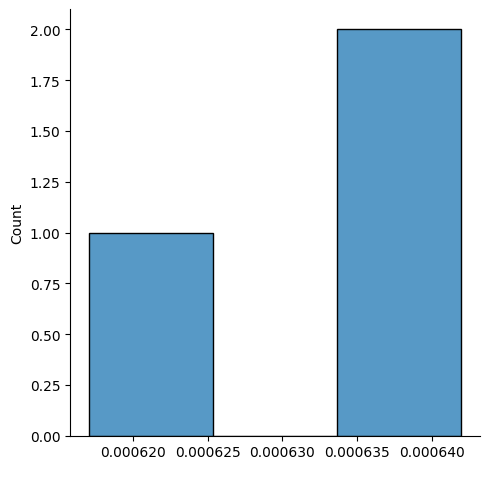

In [28]:
tt.display_histogram(th_algorithm_ex1,node=n,column="Total time (exc)")

#### Display heatmap

The `display_heatmap()` function allows users to select column(s) from the performance data table, for which a heatmap is generated based on the values of the column.

Some available keyword arguments are the following: 
* vmax: maximum value to anchor the color map.
* vmin: minimum value to anchor the color map.
* linecolor: color of the lines that will divide each cell.
* linewidths: Width of the lines that will divide each cell.

An exhaustive list of available arguments can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).  

In [29]:
th_algorithm_ex1.dataframe.columns

Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Min time/rank (exc)',
       'Max time/rank (exc)', 'Avg time/rank (exc)', 'Total time (exc)',
       'name', 'Min time/rank (inc)', 'Max time/rank (inc)',
       'Total time (inc)', 'Avg time/rank (inc)'],
      dtype='object')

<AxesSubplot: ylabel='node'>

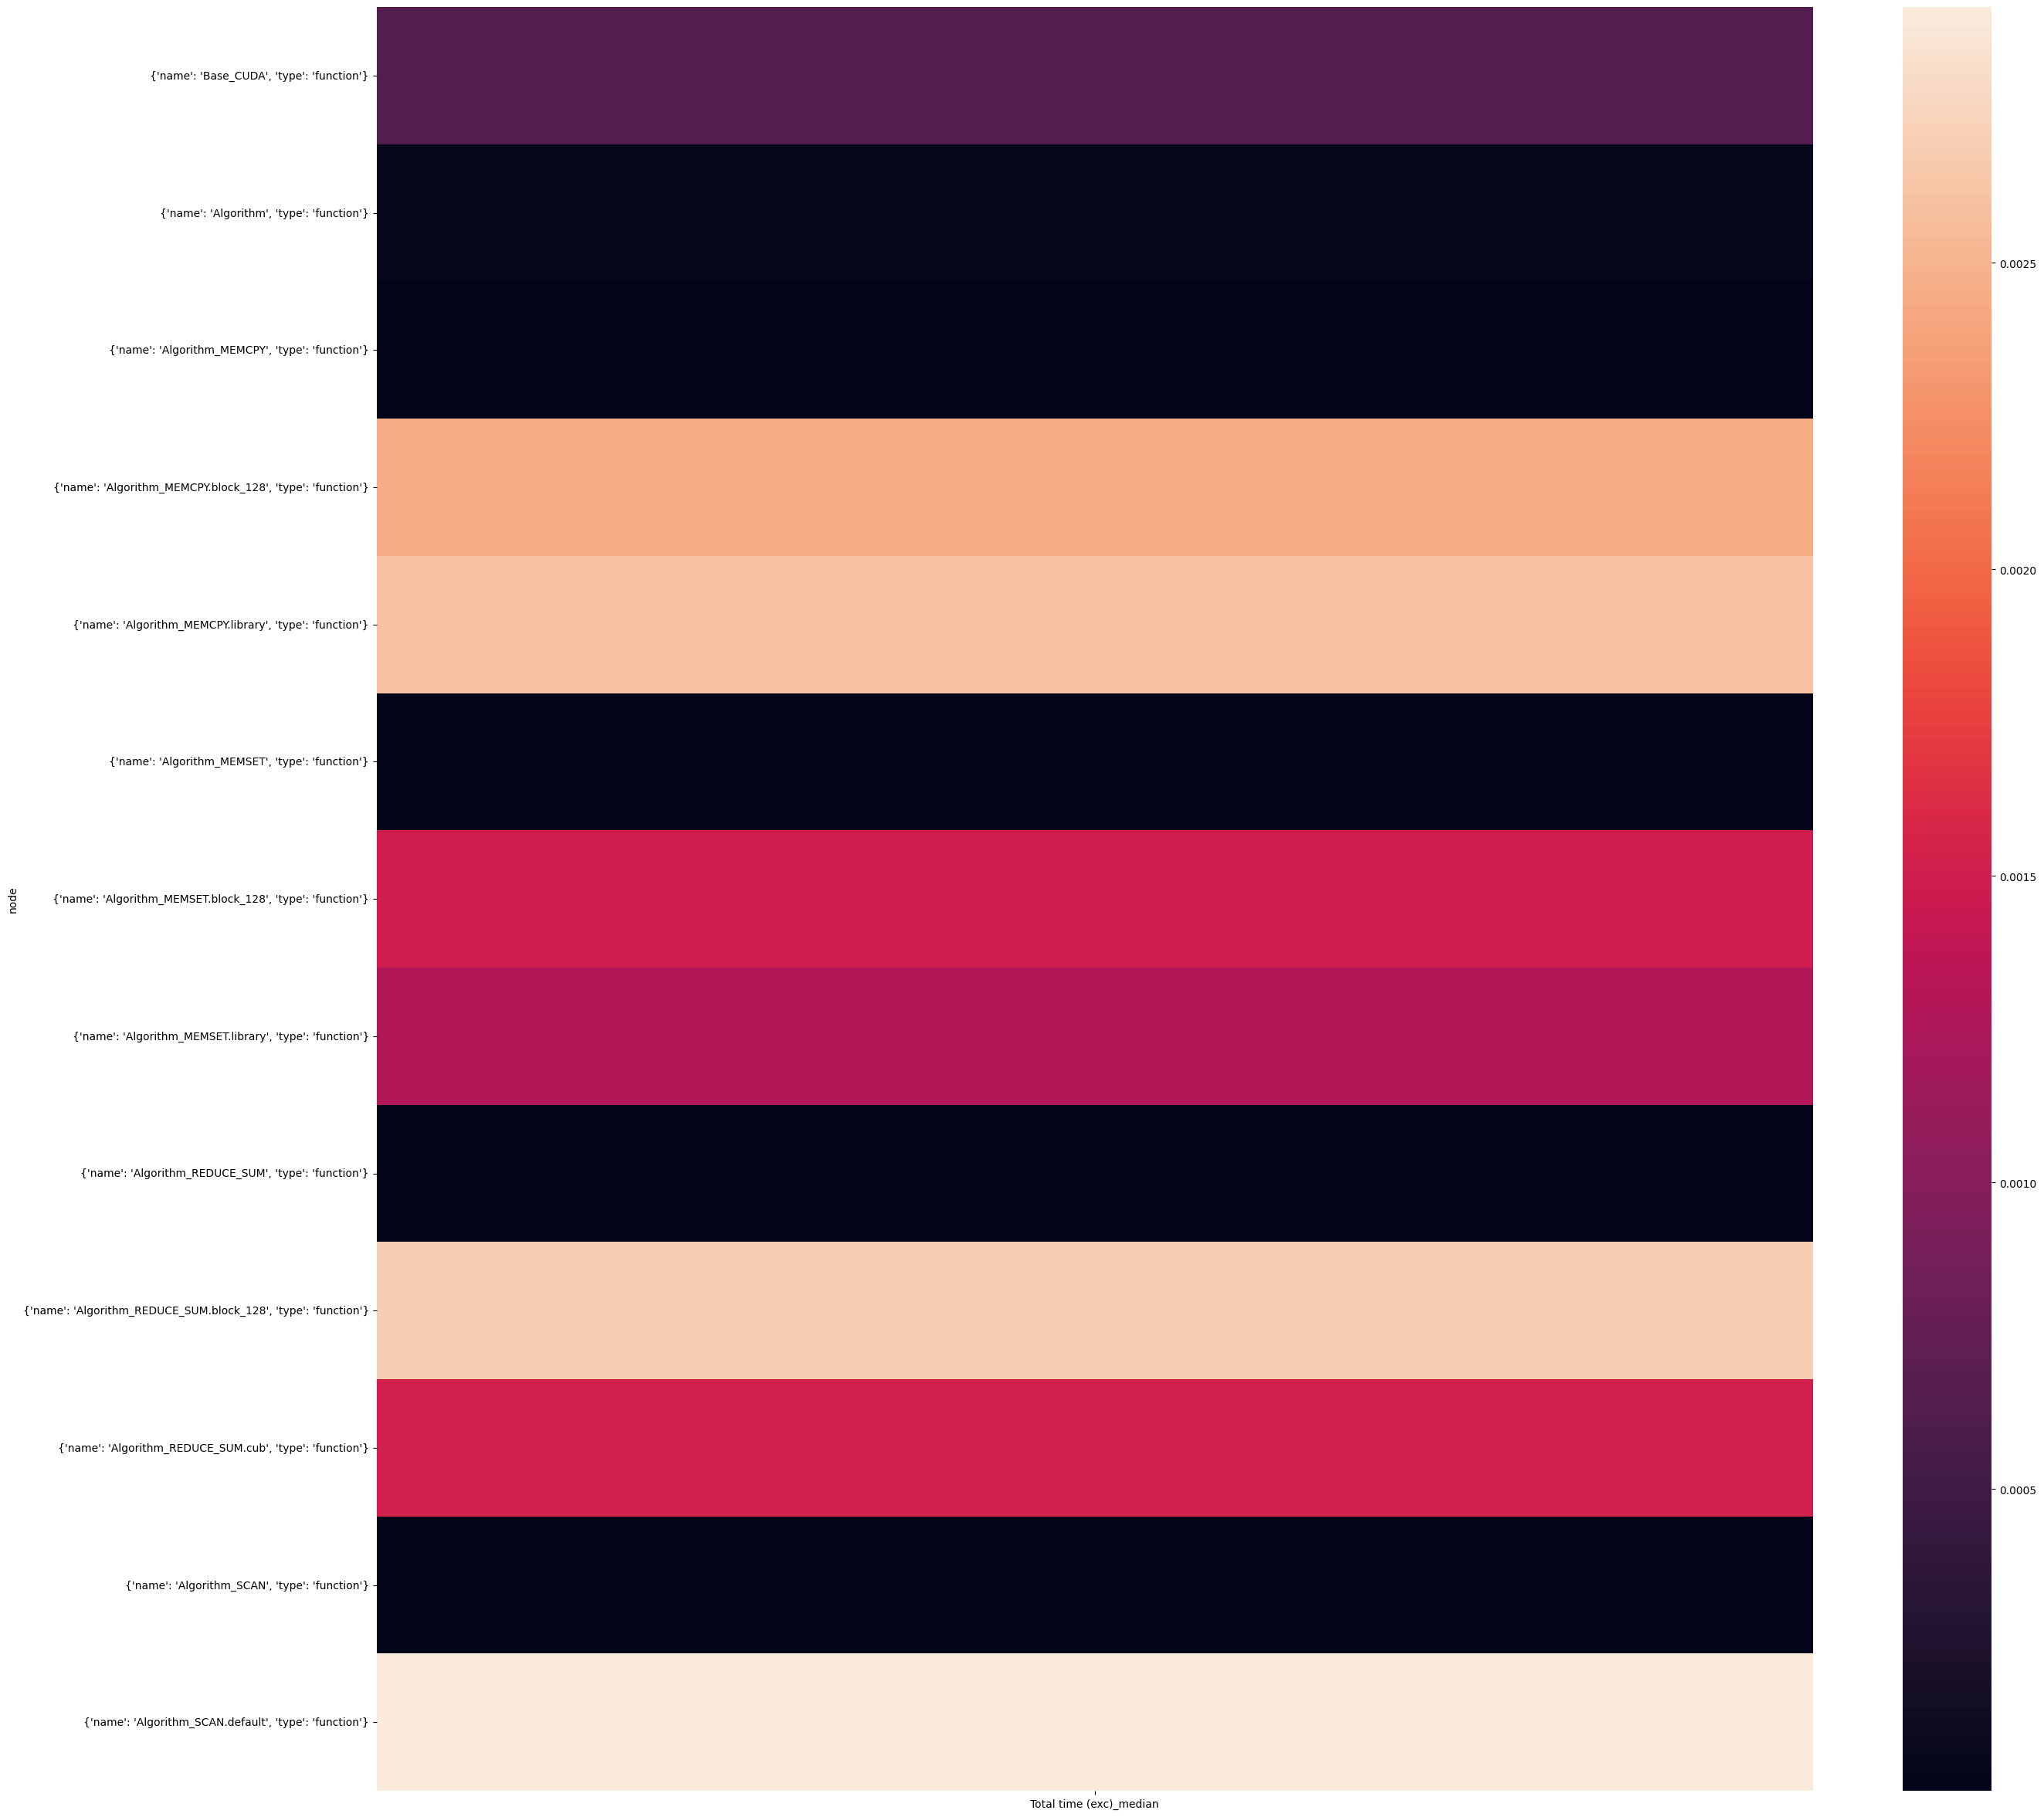

In [32]:
plt.figure(figsize = (30,30))
metrics = ["Total time (exc)_median"]
tt.display_heatmap(th_algorithm_ex1, columns=metrics)